In [9]:
### a simple molfile Viewer

from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import display, Image
import tempfile   ## handling of temporary files
import os


### defing some parameters

## file to view

molfile="examples/stereomol-ketcher.mol"
#molfile='examples/stereomol-test1.mol'

## image size
groesse=(600,400)  

## 3D to 2D structure?
twoDtrue=False


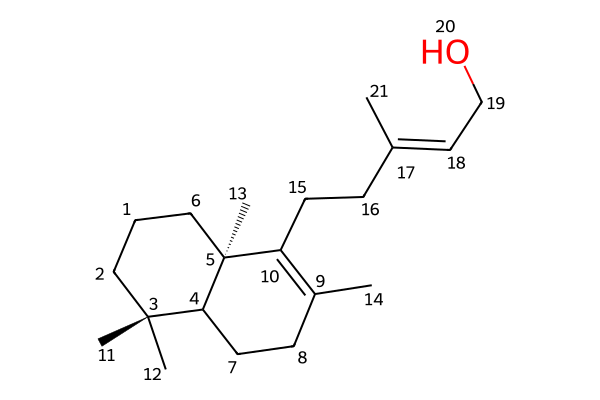

done


In [13]:
## define function to add numbers

#Generate Atom numbers
def show_atom_number(mol, label):
    for atom in mol.GetAtoms():
        atom.SetProp(label, str(atom.GetIdx()+1))
    return mol


## Is hydrogen included, True if Yes
def has_explicit_hydrogens(molT):
    # calculated explicite hydrogens
    return molT.GetNumAtoms() - molT.GetNumHeavyAtoms() > 0


## read mol file with hydrogens
## for a consistent numbering Hydrogens will read in, when included

mol1=Chem.MolFromMolFile(molfile, removeHs=False, sanitize=False)

## create numbering

show_atom_number(mol1, 'atomNote')


## look for explizit hydrogen
explizit = True   # a start value
explizit = has_explicit_hydrogens(mol1)  # False for no explicit hydrogen



## remove H's for a better view


if explizit:      # true if explicite hydrogen
    mol_ohne_H=Chem.RemoveHs(mol1)  #remove H for better display
else:
    mol_ohne_H=mol1


## generate 2D Coordinates (optional)

if twoDtrue:
    AllChem.Compute2DCoords(mol_ohne_H)


## draw image in a image object

img = Draw.MolToImage(mol_ohne_H, size=groesse)

with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as temp_file:
   temp_file_name=temp_file.name
   img.save(temp_file_name)  # save image
   display(Image(filename=temp_file_name)) #show image

print('done')